In [5]:
from skeLCS import StringEnumerator
import numpy as np
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

#Initialize StringEnumerator object with csv filepath and class label.
converter = StringEnumerator(r"C:\Users\jowen\Desktop\College\Graduate courses\Research\skeLCS\Iris\iris.csv","class")


converter.add_class_converter_random()

'''
Convert all attributes using convert_all_attributes(). Note: this is NOT a standalone method. This method
just puts all of the changes made above "into stone". This method does not automatically convert anything for you. You
MUST call this method if data transformation operations were invoked (any of the class/attributeConverter methods
above), or you will not see any changes when you call get_params().
'''
converter.convert_all_attributes()

#Get arrays using get_params()
headers,classLabel,dataFeatures,dataActions = converter.get_params()

dataFeatures_train, dataFeatures_test, dataActions_train, dataActions_test = train_test_split(dataFeatures, dataActions, stratify=dataActions, random_state=1)

DataActions_train=LabelBinarizer().fit_transform(dataActions_train)
DataActions_test=LabelBinarizer().fit_transform(dataActions_test)

print("Data Features")
print(dataFeatures)
print("\nData test Features")
print(dataFeatures_test)
print("\nData train Features")
print(dataFeatures_train)

print("\nData Actions")
print(dataActions)
print("\nData test Actions array")
print(DataActions_test)
print("\nData train Phenotypes array")
print(DataActions_train)

print("\nData Headers")
print(headers)

Data Features
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5

In [6]:
np.shape(dataActions_test)

(38,)

In [8]:
from skXCS import XCS

model = XCS()

In [9]:
model = XCS(learning_iterations = 5000,nu = 10)

In [10]:
model = XCS(learning_iterations = 5000)
trainedModel = model.fit(dataFeatures_train,dataActions_train)

trainedModel

XCS(learning_iterations=5000, theta_matching=3)

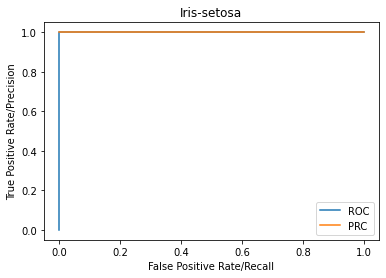

PRC AUC:1.0
ROC AUC:1.0


In [11]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

probs = trainedModel.predict_proba(dataFeatures_test)
fpr1, tpr1, thresholds1 = roc_curve(DataActions_test[:,0], probs[:, 0])
prec1, recall1, thresholds1 = precision_recall_curve(DataActions_test[:,0], probs[:, 0])

plt.plot(fpr1,tpr1,label="ROC")
plt.plot(recall1,prec1,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('Iris-setosa')
plt.show()

print("PRC AUC:" + str(auc(recall1, prec1)))
print("ROC AUC:" + str(auc(fpr1, tpr1)))

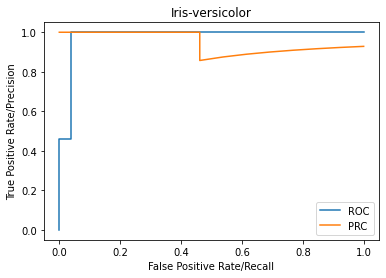

PRC AUC:0.9465831177369637
ROC AUC:0.9784615384615384


In [12]:
fpr2, tpr2, thresholds2 = roc_curve(DataActions_test[:,1], probs[:, 1])
prec2, recall2, thresholds2 = precision_recall_curve(DataActions_test[:,1], probs[:, 1])

plt.plot(fpr2,tpr2,label="ROC")
plt.plot(recall2,prec2,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.title('Iris-versicolor')
plt.legend()
plt.show()

print("PRC AUC:" + str(auc(recall2, prec2)))
print("ROC AUC:" + str(auc(fpr2, tpr2)))

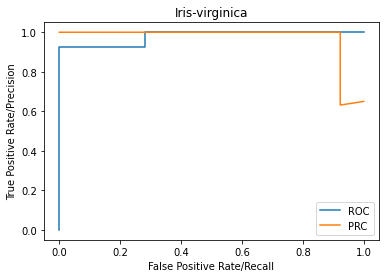

PRC AUC:0.9723684210526313
ROC AUC:0.9784615384615385


In [13]:
fpr3, tpr3, thresholds3 = roc_curve(DataActions_test[:,2], probs[:, 2])
prec3, recall3, thresholds3 = precision_recall_curve(DataActions_test[:,2], probs[:, 2])

plt.plot(fpr3,tpr3,label="ROC")
plt.plot(recall3,prec3,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.title('Iris-virginica')
plt.legend()
plt.show()

print("PRC AUC:" + str(auc(recall3, prec3)))
print("ROC AUC:" + str(auc(fpr3, tpr3)))

In [14]:
trainedModel.export_iteration_tracking_data("iterationData_Iris_XCS.csv")

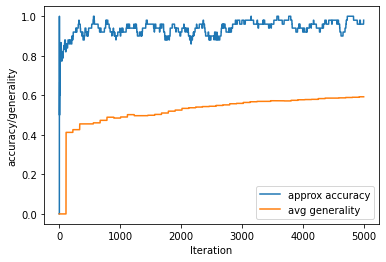

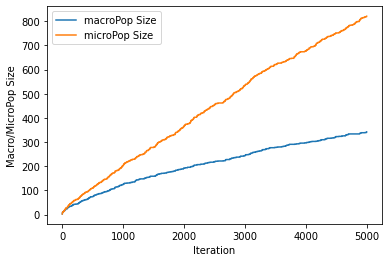

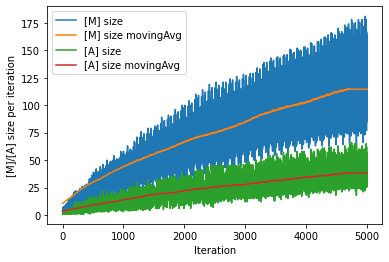

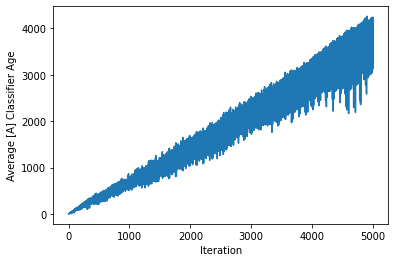

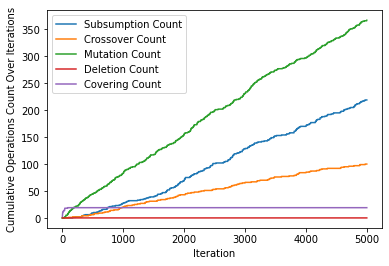

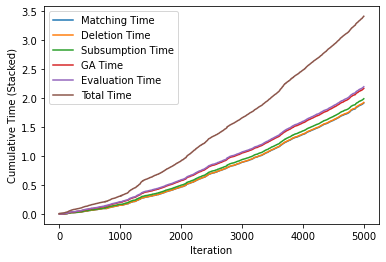

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

def cumulativeFreq(freq):
    a = []
    c = []
    for i in freq:
        a.append(i+sum(c))
        c.append(i)
    return np.array(a)

def movingAvg(a,threshold=300):
    weights = np.repeat(1.0,threshold)/threshold
    conv = np.convolve(a,weights,'valid')
    return np.append(conv,np.full(threshold-1,conv[conv.size-1]),)

dataTracking = pd.read_csv("iterationData_Iris_XCS.csv")

iterations = dataTracking["Iteration"].values
accuracy = dataTracking['Accuracy (approx)'].values
generality = dataTracking['Average Population Generality'].values
macroPop = dataTracking["Macropopulation Size"].values
microPop = dataTracking["Micropopulation Size"].values
mSize = dataTracking["Match Set Size"].values
aSize = dataTracking["Action Set Size"].values
experience = dataTracking["Average Iteration Age of Action Set Classifiers"].values
subsumption = dataTracking["# Classifiers Subsumed in Iteration"].values
crossover = dataTracking["# Crossover Operations Performed in Iteration"].values
mutation = dataTracking["# Mutation Operations Performed in Iteration"].values
covering = dataTracking["# Covering Operations Performed in Iteration"].values
deletion = dataTracking["# Deletion Operations Performed in Iteration"].values

gTime = dataTracking["Total Global Time"].values
mTime = dataTracking["Total Matching Time"].values
delTime = dataTracking["Total Deletion Time"].values
subTime = dataTracking["Total Subsumption Time"].values
selTime = dataTracking["Total GA Time"].values
evalTime = dataTracking["Total Evaluation Time"].values

plt.plot(iterations,accuracy,label="approx accuracy")
plt.plot(iterations,generality,label="avg generality")
plt.xlabel('Iteration')
plt.ylabel('accuracy/generality')
plt.legend()
plt.show()

plt.plot(iterations,macroPop,label="macroPop Size")
plt.plot(iterations,microPop,label="microPop Size")
plt.xlabel('Iteration')
plt.ylabel('Macro/MicroPop Size')
plt.legend()
plt.show()

plt.plot(iterations,mSize,label="[M] size")
plt.plot(iterations,movingAvg(mSize),label="[M] size movingAvg")
plt.plot(iterations,aSize,label="[A] size")
plt.plot(iterations,movingAvg(aSize),label="[A] size movingAvg")
plt.xlabel('Iteration')
plt.ylabel('[M]/[A] size per iteration')
plt.legend()
plt.show()

plt.plot(iterations,experience)
plt.ylabel('Average [A] Classifier Age')
plt.xlabel('Iteration')
plt.show()

plt.plot(iterations,cumulativeFreq(subsumption),label="Subsumption Count")
plt.plot(iterations,cumulativeFreq(crossover),label="Crossover Count")
plt.plot(iterations,cumulativeFreq(mutation),label="Mutation Count")
plt.plot(iterations,cumulativeFreq(deletion),label="Deletion Count")
plt.plot(iterations,cumulativeFreq(covering),label="Covering Count")
plt.xlabel('Iteration')
plt.ylabel('Cumulative Operations Count Over Iterations')
plt.legend()
plt.show()

plt.plot(iterations,mTime,label="Matching Time")
plt.plot(iterations,delTime+mTime,label="Deletion Time")
plt.plot(iterations,subTime+delTime+mTime,label="Subsumption Time")
plt.plot(iterations,selTime+subTime+delTime+mTime,label="GA Time")
plt.plot(iterations,evalTime+selTime+subTime+delTime+mTime,label="Evaluation Time")
plt.plot(iterations,gTime,label="Total Time")
plt.xlabel('Iteration')
plt.ylabel('Cumulative Time (Stacked)')
plt.legend()
plt.show()

In [16]:
trainedModel.export_final_rule_population("RulePopulation_Iris_XCS.csv",headers,classLabel)

populationData2 = pd.read_csv("RulePopulation_Iris_XCS.csv")
display(populationData2)

,sepal length,sepal width,petal length,petal width,class,Fitness,Prediction,Prediction Error,Accuracy,Numerosity,Avg Action Set Size,TimeStamp GA,Iteration Initialized,Specificity,Deletion Probability,Experience,Match Count
0,"4.332,5.268",#,#,"-0.37200000000000005,0.972",2.0,1.291820e-02,0.000000,0.000000,1.000000e+00,1,89.009866,4974,0,0.50,NaN,245,1298
1,#,"2.45,3.55",#,"-0.03600000000000003,0.636",0.0,4.509137e-02,1000.000000,0.000000,1.000000e+00,3,88.141224,4937,0,0.50,NaN,742,1116
2,"4.026,5.574",#,"-0.7240000000000002,3.524",#,1.0,1.114159e-10,302.467631,367.460970,1.492602e-09,2,102.536170,4973,0,0.50,NaN,356,1743
3,"5.0680000000000005,7.732","2.682,3.5180000000000002",#,#,1.0,6.055658e-05,797.293825,308.019271,3.606704e-09,7,70.285244,4973,1,0.50,NaN,947,2768
4,#,#,"3.4349999999999996,7.565","1.2000000000000002,2.4",0.0,1.234976e-01,0.000000,0.000000,1.000000e+00,13,114.165732,4972,1,0.50,NaN,397,2499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,#,#,"0.2264999999999998,3.1585",#,0.0,5.480123e-05,992.963126,30.141279,4.019681e-04,1,84.029607,4971,4906,0.25,NaN,20,31
338,#,#,#,"1.2000000000000002,2.4",0.0,8.798169e-03,0.000000,0.000000,1.000000e+00,1,114.291571,4972,4907,0.25,NaN,11,49
339,"3.526,5.268",#,#,"-0.132,0.732",1.0,1.136020e-03,0.000000,0.000000,1.000000e+00,1,112.654234,4973,4973,0.50,NaN,0,9
340,"5.327999999999999,7.272","2.583,3.105",#,"1.6400000000000001,2.556",2.0,5.029440e-04,973.156454,69.793219,6.038567e-06,1,92.677431,4999,4999,0.75,NaN,0,0


In [17]:
trainedModel.export_final_rule_population_DCAL("RulePopulation2_Iris_XCS.csv",headers,classLabel)

populationData2 = pd.read_csv("RulePopulation2_Iris_XCS.csv")
display(populationData2)

,Specified Values,Specified Attribute Names,class,Fitness,Prediction,Prediction Error,Accuracy,Numerosity,Avg Action Set Size,TimeStamp GA,Iteration Initialized,Specificity,Deletion Probability,Experience,Match Count
0,"[4.332,5.268], [-0.37200000000000005,0.972]","sepal length, petal width",2.0,1.291820e-02,0.000000,0.000000,1.000000e+00,1,89.009866,4974,0,0.50,NaN,245,1298
1,"[2.45,3.55], [-0.03600000000000003,0.636]","sepal width, petal width",0.0,4.509137e-02,1000.000000,0.000000,1.000000e+00,3,88.141224,4937,0,0.50,NaN,742,1116
2,"[4.026,5.574], [-0.7240000000000002,3.524]","sepal length, petal length",1.0,1.114159e-10,302.467631,367.460970,1.492602e-09,2,102.536170,4973,0,0.50,NaN,356,1743
3,"[5.0680000000000005,7.732], [2.682,3.518000000...","sepal length, sepal width",1.0,6.055658e-05,797.293825,308.019271,3.606704e-09,7,70.285244,4973,1,0.50,NaN,947,2768
4,"[3.4349999999999996,7.565], [1.200000000000000...","petal length, petal width",0.0,1.234976e-01,0.000000,0.000000,1.000000e+00,13,114.165732,4972,1,0.50,NaN,397,2499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,"[0.2264999999999998,3.1585]",petal length,0.0,5.480123e-05,992.963126,30.141279,4.019681e-04,1,84.029607,4971,4906,0.25,NaN,20,31
338,"[1.2000000000000002,2.4]",petal width,0.0,8.798169e-03,0.000000,0.000000,1.000000e+00,1,114.291571,4972,4907,0.25,NaN,11,49
339,"[3.526,5.268], [-0.132,0.732]","sepal length, petal width",1.0,1.136020e-03,0.000000,0.000000,1.000000e+00,1,112.654234,4973,4973,0.50,NaN,0,9
340,"[5.327999999999999,7.272], [2.583,3.105], [1.6...","sepal length, sepal width, petal width",2.0,5.029440e-04,973.156454,69.793219,6.038567e-06,1,92.677431,4999,4999,0.75,NaN,0,0
